In [1]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
sns.set()

/home/hchaves/GitHub/coc472-cad/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
results = pd.DataFrame(columns=["n_rows", 
"time_c_normal", "time_c_reversed",  
"time_fortran_normal", "time_fortran_reversed"])
results

,n_rows,time_c_normal,time_c_reversed,time_fortran_normal,time_fortran_reversed


In [3]:
# Considerando 16GB disponível
# n = 46339
# 8*(n**2 + 2*n) <= 16*2**30  == True

# N_MAX_ROWS = 46339


In [4]:
N_MAX_ROWS = 16384

results["n_rows"] = [2, 5, 10, 50, 100, 500, 1000, 5000, 10000, 15000, 20000]
# results["n_rows"] = np.linspace(2, N_MAX_ROWS, 20).astype(int)
results["n_rows"]

0         2
1         5
2        10
3        50
4       100
5       500
6      1000
7      5000
8     10000
9     15000
10    20000
Name: n_rows, dtype: int64

#### Analysis - Program in C Language (Normal Loop)

In [5]:
for n_rows in tqdm(results["n_rows"].tolist()):
  start = time()
  !./main_c $n_rows 0
  end = time()
  offset = end - start

  results.loc[results["n_rows"] == n_rows, "time_c_normal"] = offset

  0%|          | 0/11 [00:00<?, ?it/s]

Normal Loop


  9%|▉         | 1/11 [00:00<00:01,  5.82it/s]

Normal Loop


 18%|█▊        | 2/11 [00:00<00:01,  5.88it/s]

Normal Loop


 27%|██▋       | 3/11 [00:00<00:01,  5.91it/s]

Normal Loop


 36%|███▋      | 4/11 [00:00<00:01,  5.88it/s]

Normal Loop


 45%|████▌     | 5/11 [00:00<00:01,  5.73it/s]

Normal Loop


 55%|█████▍    | 6/11 [00:01<00:01,  3.51it/s]

Normal Loop


 64%|██████▎   | 7/11 [00:02<00:02,  1.47it/s]

Normal Loop


 73%|███████▎  | 8/11 [00:36<00:33, 11.10s/it]

Normal Loop


 82%|████████▏ | 9/11 [02:50<01:39, 49.51s/it]

Normal Loop


 91%|█████████ | 10/11 [07:50<02:06, 126.80s/it]

Normal Loop


100%|██████████| 11/11 [16:37<00:00, 90.71s/it] 


#### Analysis - Program in C Language (Reversed Loop)

In [6]:
for n_rows in tqdm(results["n_rows"].tolist()):
  start = time()
  !./main_c $n_rows 1
  end = time()
  offset = end - start

  results.loc[results["n_rows"] == n_rows, "time_c_reversed"] = offset

  0%|          | 0/11 [00:00<?, ?it/s]

Reversed Loop


  9%|▉         | 1/11 [00:00<00:01,  5.59it/s]

Reversed Loop


 18%|█▊        | 2/11 [00:00<00:01,  5.60it/s]

Reversed Loop


 27%|██▋       | 3/11 [00:00<00:01,  5.72it/s]

Reversed Loop


 36%|███▋      | 4/11 [00:00<00:01,  5.72it/s]

Reversed Loop


 45%|████▌     | 5/11 [00:00<00:01,  5.54it/s]

Reversed Loop


 55%|█████▍    | 6/11 [00:01<00:01,  3.43it/s]

Reversed Loop


 64%|██████▎   | 7/11 [00:02<00:02,  1.45it/s]

Reversed Loop


 73%|███████▎  | 8/11 [00:36<00:33, 11.16s/it]

Reversed Loop


 82%|████████▏ | 9/11 [02:49<01:38, 49.37s/it]

Reversed Loop


 91%|█████████ | 10/11 [07:49<02:06, 126.77s/it]

Reversed Loop


100%|██████████| 11/11 [16:53<00:00, 92.15s/it] 


#### Analysis - Program in Fortran Language (Normal Loop)

In [7]:
for n_rows in tqdm(results["n_rows"].tolist()):
  start = time()
  !./main_f $n_rows 0
  end = time()
  offset = end - start

  results.loc[results["n_rows"] == n_rows, "time_fortran_normal"] = offset

  0%|          | 0/11 [00:00<?, ?it/s]

 Normal Loop


  9%|▉         | 1/11 [00:00<00:01,  5.58it/s]

 Normal Loop


 18%|█▊        | 2/11 [00:00<00:01,  5.53it/s]

 Normal Loop


 27%|██▋       | 3/11 [00:00<00:01,  5.64it/s]

 Normal Loop


 36%|███▋      | 4/11 [00:00<00:01,  5.75it/s]

 Normal Loop


 45%|████▌     | 5/11 [00:00<00:01,  5.80it/s]

 Normal Loop


 55%|█████▍    | 6/11 [00:01<00:00,  5.78it/s]

 Normal Loop


 64%|██████▎   | 7/11 [00:01<00:00,  5.66it/s]

 Normal Loop


 73%|███████▎  | 8/11 [00:01<00:00,  3.20it/s]

 Normal Loop


 82%|████████▏ | 9/11 [00:03<00:01,  1.30it/s]

 Normal Loop


 91%|█████████ | 10/11 [00:07<00:01,  1.71s/it]

 Normal Loop


100%|██████████| 11/11 [00:14<00:00,  1.35s/it]


#### Analysis - Program in Fortran Language (Reversed Loop)

In [8]:
for n_rows in tqdm(results["n_rows"].tolist()):
  start = time()
  !./main_f $n_rows 1
  end = time()
  offset = end - start

  results.loc[results["n_rows"] == n_rows, "time_fortran_reversed"] = offset

  0%|          | 0/11 [00:00<?, ?it/s]

 Reversed Loop


  9%|▉         | 1/11 [00:00<00:01,  5.62it/s]

 Reversed Loop


 18%|█▊        | 2/11 [00:00<00:01,  5.47it/s]

 Reversed Loop


 27%|██▋       | 3/11 [00:00<00:01,  5.49it/s]

 Reversed Loop


 36%|███▋      | 4/11 [00:00<00:01,  5.55it/s]

 Reversed Loop


 45%|████▌     | 5/11 [00:00<00:01,  5.64it/s]

 Reversed Loop


 55%|█████▍    | 6/11 [00:01<00:00,  5.66it/s]

 Reversed Loop


 64%|██████▎   | 7/11 [00:01<00:00,  5.57it/s]

 Reversed Loop


 73%|███████▎  | 8/11 [00:01<00:00,  3.37it/s]

 Reversed Loop


 82%|████████▏ | 9/11 [00:03<00:01,  1.28it/s]

 Reversed Loop


 91%|█████████ | 10/11 [00:07<00:01,  1.68s/it]

 Reversed Loop


100%|██████████| 11/11 [00:13<00:00,  1.23s/it]


In [9]:
results

,n_rows,time_c_normal,time_c_reversed,time_fortran_normal,time_fortran_reversed
0,2,0.171001,0.17835,0.178137,0.177068
1,5,0.167109,0.176656,0.180154,0.183643
2,10,0.166638,0.169057,0.171713,0.179138
3,50,0.169732,0.173399,0.167178,0.17537
4,100,0.180687,0.188668,0.167622,0.170803
5,500,0.498636,0.505332,0.172401,0.173539
6,1000,1.494138,1.514648,0.183051,0.183338
7,5000,33.404264,33.557249,0.600081,0.546885
8,10000,133.960797,133.397044,1.766277,1.848591
9,15000,299.86659,300.090602,3.803848,3.702795


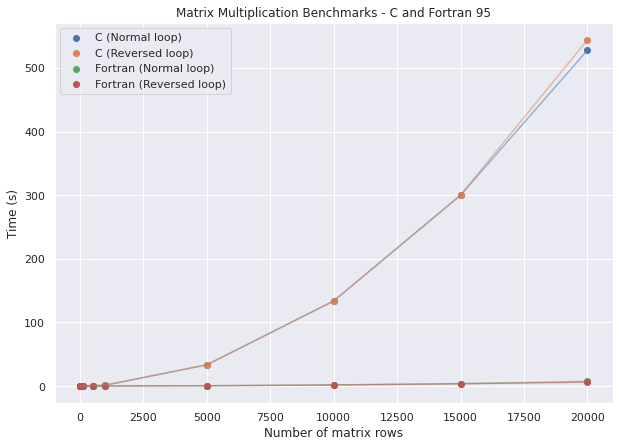

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(results["n_rows"], results["time_c_normal"],  label="C (Normal loop)")
ax.plot(results["n_rows"], results["time_c_normal"], alpha=0.5)
ax.scatter(results["n_rows"], results["time_c_reversed"], label="C (Reversed loop)")
ax.plot(results["n_rows"], results["time_c_reversed"], alpha=0.5)

ax.scatter(results["n_rows"], results["time_fortran_normal"], label="Fortran (Normal loop)")
ax.plot(results["n_rows"], results["time_fortran_normal"], alpha=0.5)
ax.scatter(results["n_rows"], results["time_fortran_reversed"], label="Fortran (Reversed loop)")
ax.plot(results["n_rows"], results["time_fortran_reversed"], alpha=0.5)

ax.set_title("Matrix Multiplication Benchmarks - C and Fortran 95")
ax.set_ylabel("Time (s)")
ax.set_xlabel("Number of matrix rows")

plt.legend()
plt.show()

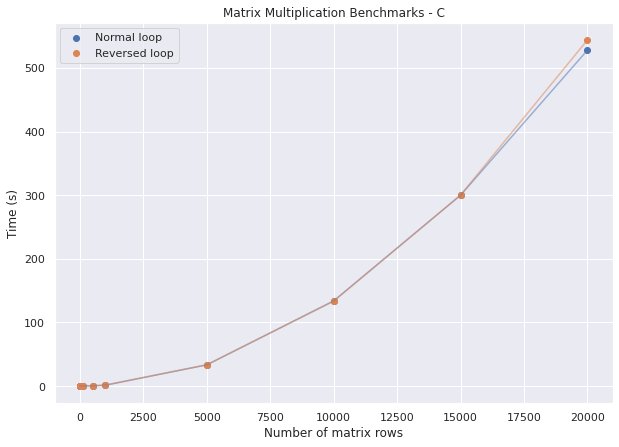

In [16]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(results["n_rows"], results["time_c_normal"],  label="Normal loop")
ax.plot(results["n_rows"], results["time_c_normal"], alpha=0.5)
ax.scatter(results["n_rows"], results["time_c_reversed"], label="Reversed loop")
ax.plot(results["n_rows"], results["time_c_reversed"], alpha=0.5)

ax.set_title("Matrix Multiplication Benchmarks - C")
ax.set_ylabel("Time (s)")
ax.set_xlabel("Number of matrix rows")

plt.legend()
plt.show()

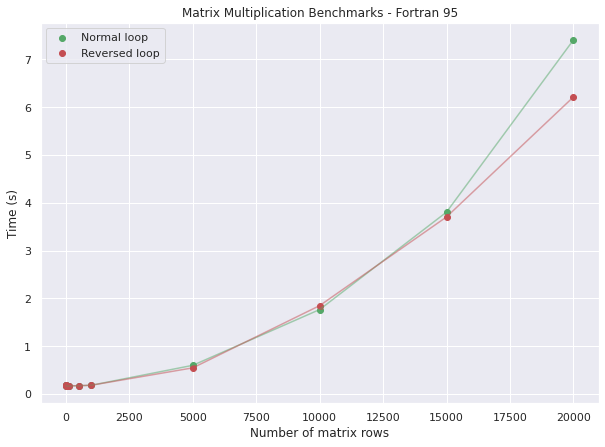

In [17]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot([])
ax.scatter([], [])
ax.plot([])
ax.scatter([], [])


ax.scatter(results["n_rows"], results["time_fortran_normal"], label="Normal loop")
ax.plot(results["n_rows"], results["time_fortran_normal"], alpha=0.5)
ax.scatter(results["n_rows"], results["time_fortran_reversed"], label="Reversed loop")
ax.plot(results["n_rows"], results["time_fortran_reversed"], alpha=0.5)

ax.set_title("Matrix Multiplication Benchmarks - Fortran 95")
ax.set_ylabel("Time (s)")
ax.set_xlabel("Number of matrix rows")

plt.legend()
plt.show()